<a href="https://colab.research.google.com/github/sourjeet/Game-of-Deep-Learning/blob/master/Blueberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Data to Google Colab

In [1]:
#!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#!pip install gputil
#!pip install psutil
#!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.8 GB  | Proc size: 120.1 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [2]:
printm()

Gen RAM Free: 12.8 GB  | Proc size: 120.1 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [0]:
#!ln -s "drive/My Drive/ColabNotebooks/GameOfDL" "/content/GameOfDL"

In [5]:
!ls -lrt GameOfDL/

total 85261
-r-------- 1 root root 87294609 May 24 06:17 train.zip
drwx------ 3 root root     4096 May 31 10:27 Data
drwx------ 2 root root     4096 Jun  4 19:22 Submissions
drwx------ 2 root root     4096 Jun  4 19:47 checkpoints


In [6]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import collections

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
def augment_data( generator, X1, y, batch_size = 32 ):
    generator_seed = np.random.randint( 9999 )
    gen_X1 = generator.flow( X1, y, batch_size = BATCH_SIZE, seed = generator_seed )

    while True:
        X1i = gen_X1.next()

        yield  X1i[0], X1i[1]

In [0]:
def resize_data(data):
    
    rSz_data = np.array(data)
    #rSz_data = rSz_data.astype('float16')
    rSz_data /= 255
    
    return rSz_data
   

In [0]:
import io
from google.colab import files
from PIL import Image

In [0]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
train = pd.read_csv("GameOfDL/Data/train.csv")
test = pd.read_csv("GameOfDL/Data/test.csv")

In [0]:
def readImages(df):
    
    img_rows=224
    img_cols=224

    img_data_list=[]
    count = 0
    
    for fileName in df['image']:
        
        input_img = cv2.imread("GameOfDL/Data/images/"+ fileName)
        input_img_resize = cv2.resize(input_img,(img_rows, img_cols))            
        img_data_list.append(input_img_resize)
        
        count +=1
        if count % 100 == 0:
          print(count)
          
    del input_img,input_img_resize, count, fileName, df
        
    return img_data_list

In [15]:
trainImages = readImages(train)
testImages  = readImages(test)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


In [16]:
#resizedTrainImages = resize_data(trainImages) 
#resizedTestImages = resize_data(testImages) 

TypeError: ignored

In [0]:
display_one(trainImages[0])

In [0]:
#del trainImages, testImages

In [0]:
arrTrainImages = np.array(trainImages) 
arrTestImages = np.array(testImages) 

In [18]:
train['category'] = train['category'] - 1
train['category'] = train['category'].astype('object')
collections.Counter(train['category'])

Counter({0: 2120, 1: 1167, 2: 916, 3: 832, 4: 1217})

In [19]:
numClasses = len(train['category'].unique())
classes = to_categorical(train['category'], numClasses)
print(classes)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [20]:
printm()

Gen RAM Free: 8.6 GB  | Proc size: 4.4 GB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(arrTrainImages, classes, test_size=0.2, random_state=2)
y_train.shape

(5001, 5)

In [22]:
X_train.shape

(5001, 224, 224, 3)

In [23]:
input_shape = trainImages[0].shape
print(input_shape)

(224, 224, 3)


In [0]:
#del image_augmentation, input_generator

In [0]:
BATCH_SIZE = 16
image_augmentation = ImageDataGenerator( rotation_range = 20,
                                             horizontal_flip = True,
                                             vertical_flip = True ,
                                            # width_shift_range = .3,
                                            # height_shift_range =.3,
                                             zoom_range = .2
                                       )
input_generator = augment_data( image_augmentation, X_train, y_train, batch_size = BATCH_SIZE )

In [25]:
from keras.applications.resnet50 import ResNet50, preprocess_input

HEIGHT = 224
WIDTH = 224

base_model = ResNet50(weights='imagenet',
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [26]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)
    

    return finetune_model

class_list = ["0","1","2","3","4"]
FC_LAYERS = [1024, 1024]
dropout = 0.1

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#finetune_model.layers

In [27]:
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 20
BATCH_SIZE = 16
num_train_images = 10000

adam = Adam(lr=0.00005,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

filepath="./GameOfDL/checkpoints/" + "ResNet50" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
callbacks_list = [checkpoint]

history = finetune_model.fit_generator( input_generator, epochs = NUM_EPOCHS, steps_per_epoch =  len(X_train)/BATCH_SIZE,
                                    verbose = 1, #validation_data = (X_test, y_test))
                                    validation_data = augment_data(image_augmentation, X_test, y_test, batch_size = BATCH_SIZE),
                                   validation_steps = len(X_test)/BATCH_SIZE,callbacks=callbacks_list)





Instructions for updating:
Use tf.cast instead.
Epoch 1/20
313/312 [==============================] - 107s 341ms/step - loss: 0.9509 - acc: 0.6924 - val_loss: 0.8151 - val_acc: 0.6970

Epoch 00001: saving model to ./GameOfDL/checkpoints/ResNet50_model_weights.h5
Epoch 2/20
313/312 [==============================] - 96s 307ms/step - loss: 0.5855 - acc: 0.7954 - val_loss: 0.7126 - val_acc: 0.7282

Epoch 00002: saving model to ./GameOfDL/checkpoints/ResNet50_model_weights.h5
Epoch 3/20
313/312 [==============================] - 96s 308ms/step - loss: 0.4903 - acc: 0.8200 - val_loss: 0.7069 - val_acc: 0.7322

Epoch 00003: saving model to ./GameOfDL/checkpoints/ResNet50_model_weights.h5
Epoch 4/20
313/312 [==============================] - 97s 308ms/step - loss: 0.4383 - acc: 0.8407 - val_loss: 0.7842 - val_acc: 0.7194

Epoch 00004: saving model to ./GameOfDL/checkpoints/ResNet50_model_weights.h5
Epoch 5/20
313/312 [==============================] - 96s 307ms/step - loss: 0.3971 - acc: 0.84

In [0]:
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')

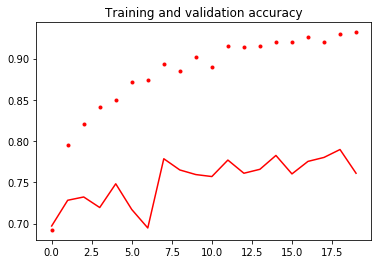

<Figure size 432x288 with 0 Axes>

In [30]:
plot_training(history)


In [0]:
prediction = finetune_model.predict(arrTestImages)
prediction = np.argmax(prediction, axis=1)

In [32]:
predictionUpd = prediction + 1
collections.Counter(predictionUpd)

Counter({1: 1358, 2: 375, 3: 310, 4: 507, 5: 130})

In [0]:
pred_5 = pd.DataFrame(predictionUpd, columns=['category'])
pred_5 = pred_5.set_index(test['image'])

pred_5.to_csv('./GameOfDL/Submissions/submission5.csv',sep=',',index =True)